In [1]:
import numpy as np
import pandas as pd
from visits import Visit, Cohort, rolling_autocorrelation
import glob
import pymannkendall as mk
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
hr_averages_c1 = pd.read_csv("averages_data/hr_averages_c1.csv", sep=",")
rr_averages_c1 = pd.read_csv("averages_data/rr_averages_c1.csv", sep=",")
abf_averages_c1 = pd.read_csv("averages_data/abf_averages_c1.csv", sep=",")

hr_averages_c3 = pd.read_csv("averages_data/hr_averages_c3.csv", sep=",")
rr_averages_c3 = pd.read_csv("averages_data/rr_averages_c3.csv", sep=",")
abf_averages_c3 = pd.read_csv("averages_data/abf_averages_c3.csv", sep=",")


In [3]:
hr_averages_c1 = hr_averages_c1.dropna()
rr_averages_c1 = rr_averages_c1.dropna()
abf_averages_c1 = abf_averages_c1.dropna()

hr_averages_c3 = hr_averages_c3.dropna()
rr_averages_c3 = rr_averages_c3.dropna()
abf_averages_c3 = abf_averages_c3.dropna()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  4.,  2.,  5.,  9., 11., 23., 23.,
        12.,  8.,  2.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  3.]),
 array([-516.26251483, -502.62244403, -488.98237323, -475.34230242,
        -461.70223162, -448.06216082, -434.42209002, -420.78201921,
        -407.14194841, -393.50187761, -379.8618068 , -366.221736  ,
        -352.5816652 , -338.9415944 , -325.30152359, -311.66145279,
        -298.02138199, -284.38131118, -270.74124038, -257.10116958,
        -243.46109878, -229.82102797, -216.18095717, -202.54088637,
        -188.90081556, -175.26074476, -161.62067396, -147.98060316,
        -134.34053235, -120.70046155, -107.06039075,  -93.42031994,
         -79.78024914,  -66.14017834,  -52.50010754,  -38.86003673,
         -25.21996593,  -11.57989513,    2.06017568,   15.70024648,
          29.34031728,   42.98038808

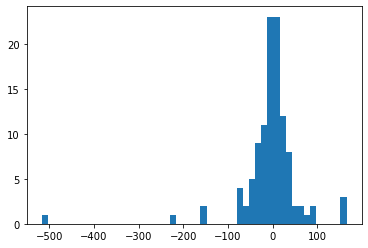

In [4]:
plt.hist(hr_averages_c1['var_diff'], bins=50)


In [5]:
p_vals = []

In [6]:
s, p = stats.ttest_rel(hr_averages_c1["var_hr_1"], hr_averages_c1["var_hr_2"], alternative='less')
p_vals.append(p)

In [7]:
s, p = stats.ttest_rel(hr_averages_c1["ac_hr_1"], hr_averages_c1["ac_hr_2"], alternative='less')
p_vals.append(p)

In [8]:
s, p = stats.ttest_rel(rr_averages_c1["var_hr_1"], rr_averages_c1["var_hr_2"], alternative='less')
p_vals.append(p)

In [9]:
s, p = stats.ttest_rel(rr_averages_c1["ac_hr_1"], rr_averages_c1["ac_hr_2"], alternative='less')
p_vals.append(p)

In [10]:
s, p = stats.ttest_rel(abf_averages_c1["var_hr_1"], abf_averages_c1["var_hr_2"], alternative='less')
p_vals.append(p)

In [11]:
s, p = stats.ttest_rel(abf_averages_c1["ac_hr_1"], abf_averages_c1["ac_hr_2"], alternative='less')
p_vals.append(p)

In [12]:
p_vals

[0.7621912976872469,
 0.05538305025203344,
 0.9489669176671472,
 0.39900238970971624,
 0.15956791385898536,
 0.19889526482169018]

In [13]:
p_vals_c3 = []
s, p = stats.ttest_rel(hr_averages_c3["var_hr_1"], hr_averages_c3["var_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(hr_averages_c3["ac_hr_1"], hr_averages_c3["ac_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(rr_averages_c3["var_hr_1"], rr_averages_c3["var_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(rr_averages_c3["ac_hr_1"], rr_averages_c3["ac_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(abf_averages_c3["var_hr_1"], abf_averages_c3["var_hr_2"], alternative='less')
p_vals_c3.append(p)
s, p = stats.ttest_rel(abf_averages_c3["ac_hr_1"], abf_averages_c3["ac_hr_2"], alternative='less')
p_vals_c3.append(p)

In [14]:
p_vals_c3

[0.029519011435029014,
 0.8620409859332699,
 0.012243559947190943,
 0.9996346243146884,
 0.05017111897281451,
 0.28520613999811106]